# Enoncé

1. Transformer le code d'apprentissage de la séance 01 en une librairie.
2.  Coder une fonction d'erreur quadratique moyenne entre une prédiction et la vraie cible.
3. Etudier la dépendance de l'erreur par rapport
     - à la distribution des points de l'échantillon (par exemple uniforme ou équirépartis)
     - La loi du bruit.
     - Le degrés du polynôme.
4. Comment pouvons nous estimer l'erreur commise à partir de l'échantillon et sans la cible?
5. Trouvez une alternative au modèle polynomial.

# Question 1

On les objets suivants:
- La cible.
- L'échantillon.
- Le modèle.
- Le prédicteur.

On aura besoin de fonctions qui
- Génère l'affichage à partir de: cible, échantillon, prédicteur.
- Crée l'échantillon à partir de la cible.
- Génère le meilleur prédicteur à partir de l'échantillon et du modèle.

In [1]:
import lib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
cible = lib.Cible(
    fonction=lambda x: np.exp(1. / (2. + np.sin(5 * x) * np.cos(20 * x))),
    gauche=0.,
    droite=1.,
)

In [4]:
echantillon = lib.genere_echantillon(
    cible=cible, 
    nb_points=20, 
    choix_points=lib.Points.uniforme, 
    choix_bruit=lib.Bruit.normale, 
    amplitude=0.1
)

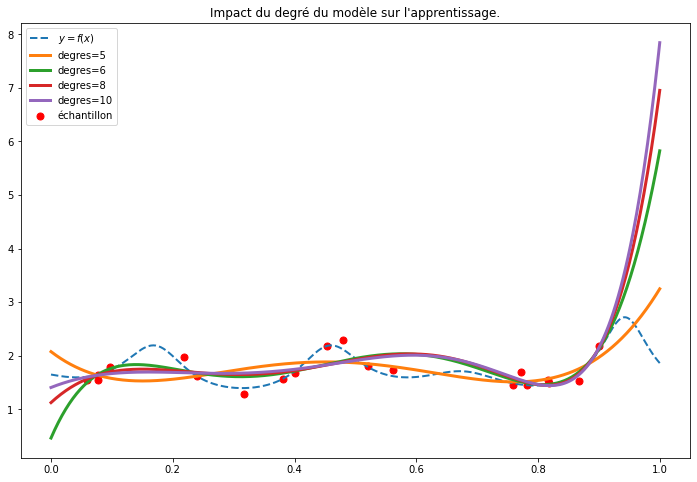

In [5]:
fig, rep = plt.subplots()
rep.set_title("Impact du degré du modèle sur l'apprentissage.")
lib.affichage_cible(cible, rep)
lib.affichage_echantillon(echantillon, repere=rep)
for degre in (5, 6, 8, 10):
    modele = lib.ModelePolynomial(degre)
    modele.entraine(echantillon)
    modele.affichage(cible=cible, repere=rep)
    rep.legend()


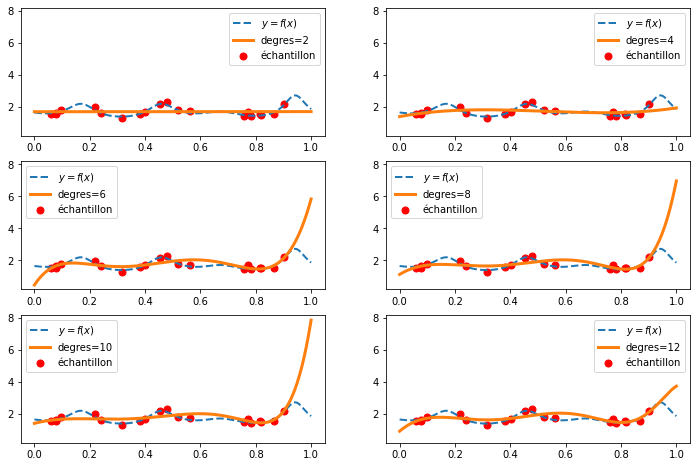

In [7]:
degres = (2, 4, 6, 8, 10, 12)
fig, reps = plt.subplots(nrows=3, ncols=2)

for degre, rep in zip(degres, reps.flatten()):
    lib.affichage_cible(cible, rep)
    lib.affichage_echantillon(echantillon, repere=rep)
    modele = lib.ModelePolynomial(degre)
    modele.entraine(echantillon)
    modele.affichage(cible=cible, repere=rep)
    rep.legend()

lims = [rep.get_ylim() for rep in reps.flatten()]
y_min = min(m for m,_ in lims)
y_max = max(M for _,M in lims)
for rep in reps.flatten():
    rep.set_ylim(y_min, y_max)
    
